In [1]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc 
import sklearn as sk
import seaborn as sns

In [2]:
# convert the data from files format into dataframe

# ! pip install pyreadstat

1. Data Acquisition 

In [3]:
# Read data from CSV file 

dataset = pd.read_csv("healthcare-dataset-stroke-data.csv")
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
dataset.drop(columns='id', inplace=True)

In [5]:
dataset.info

<bound method DataFrame.info of       gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type

In [6]:
dataset.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

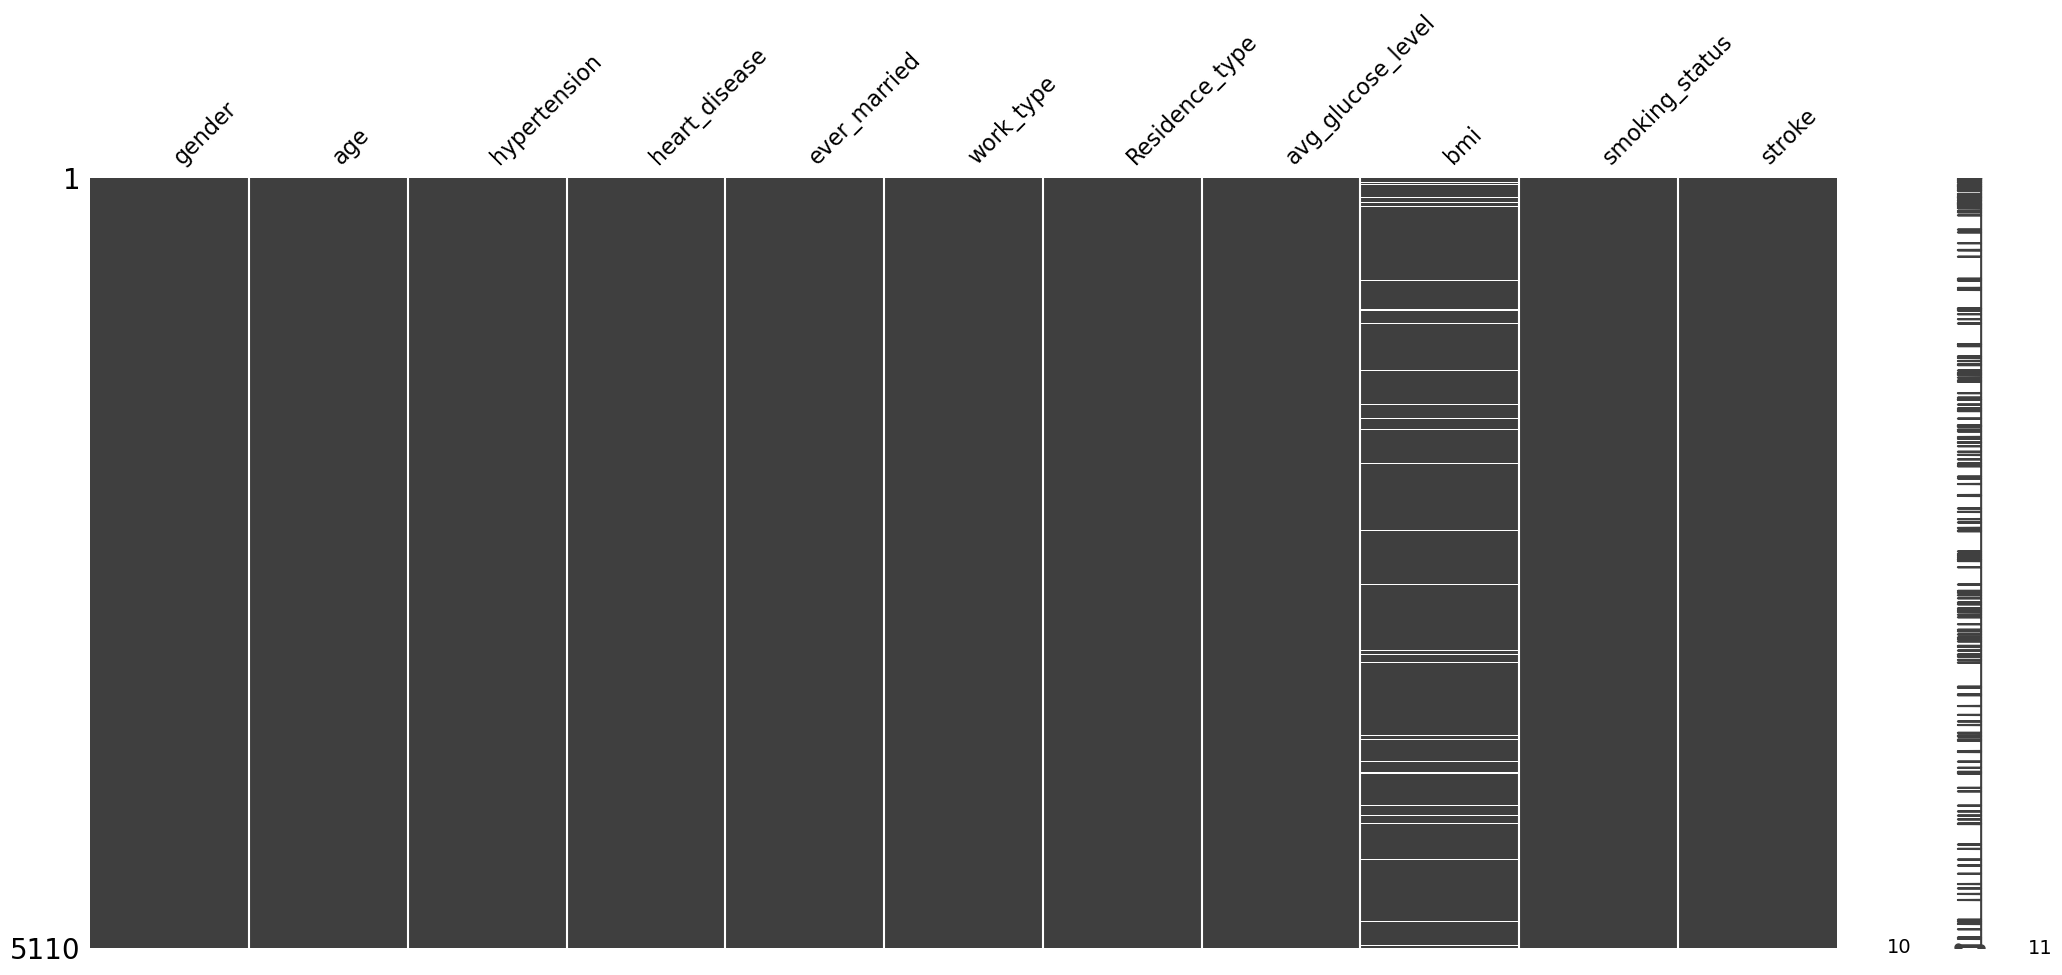

In [7]:
import missingno as msno
msno.matrix(dataset)
plt.show()

In [8]:
# Fill null values by mean of the bmi column
dataset['bmi'] = dataset['bmi'].fillna(dataset['bmi'].mean()) 
dataset.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
dataset.duplicated().sum()

0

In [10]:
dataset.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [11]:
dataset.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [13]:
# Stroring all column names 
col=dataset.columns.tolist()

## Exploratory Data Analysis 

In [14]:
dataset['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

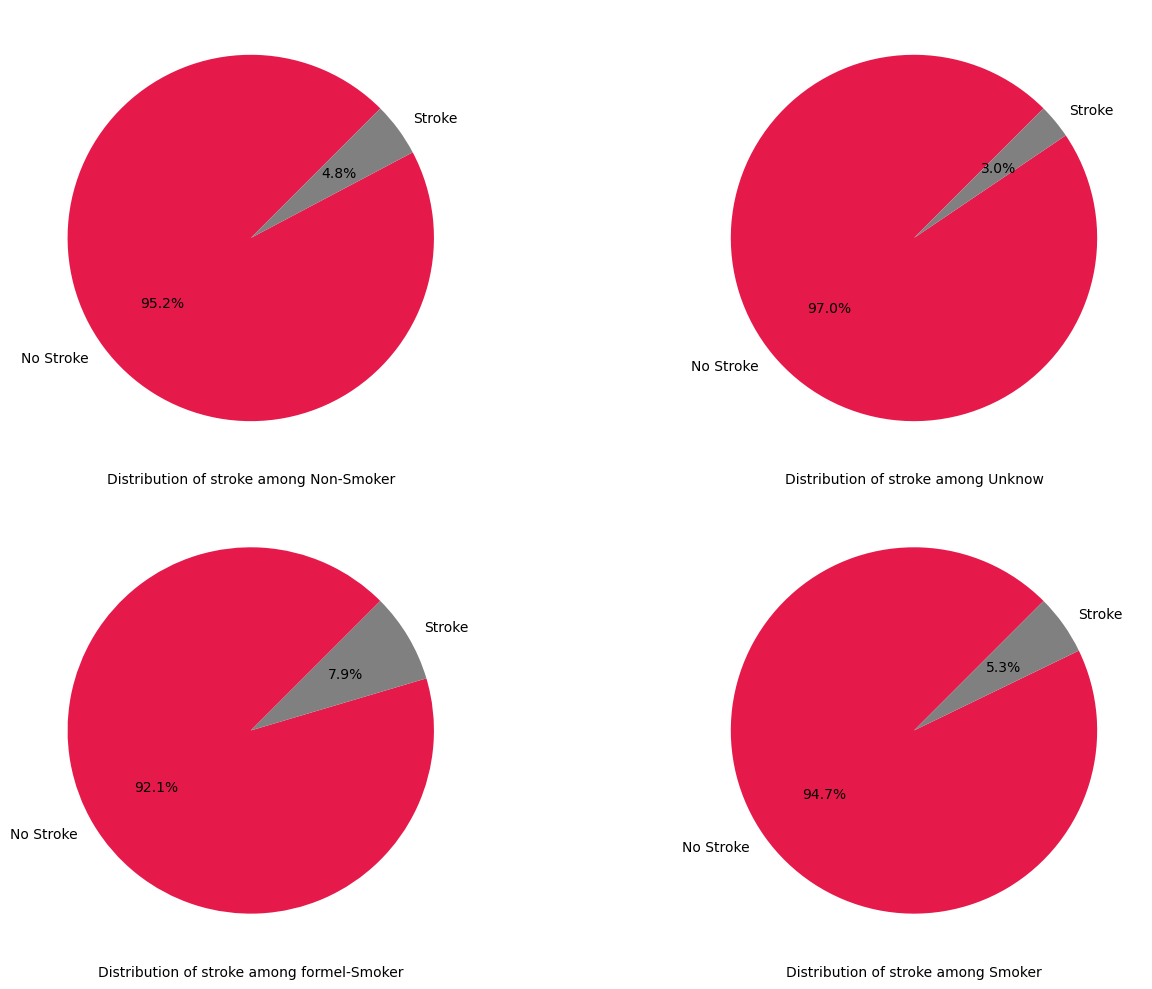

In [18]:
fig,ax=plt.subplots(2,2,figsize=(15,10))

color1= ['#e6194b','gray']
ax[0,0].pie(x=dataset.loc[dataset['smoking_status']=='never smoked']['stroke'].value_counts(),
        labels=['No Stroke','Stroke'],startangle=45,
        autopct='%1.1f%%',colors=color1)
ax[0,0].set_xlabel("Distribution of stroke among Non-Smoker")

ax[0,1].pie(x=dataset.loc[dataset['smoking_status']=='Unknown']['stroke'].value_counts(),
        labels=['No Stroke','Stroke'],startangle=45,
        autopct='%1.1f%%',colors=color1)
ax[0,1].set_xlabel("Distribution of stroke among Unknow")

ax[1,0].pie(x=dataset.loc[dataset['smoking_status']=='formerly smoked']['stroke'].value_counts(),
        labels=['No Stroke','Stroke'],startangle=45,
        autopct='%1.1f%%',colors=color1)
ax[1,0].set_xlabel("Distribution of stroke among formel-Smoker")
   
ax[1,1].pie(x=dataset.loc[dataset['smoking_status']=='smokes']['stroke'].value_counts(),
        labels=['No Stroke','Stroke'],startangle=45,
        autopct='%1.1f%%',colors=color1)
ax[1,1].set_xlabel("Distribution of stroke among Smoker")
plt.tight_layout()
plt.show()

In [19]:
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


Text(0.5, 0, 'Distribution of stroke among Female')

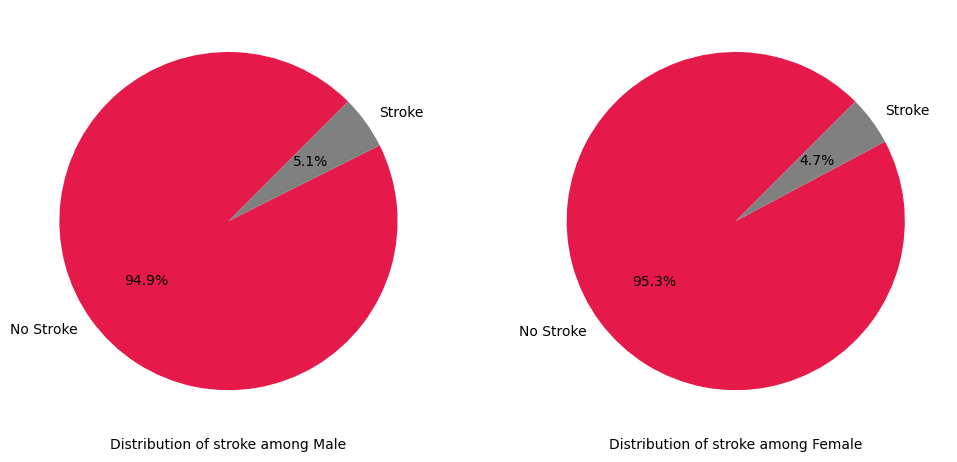

In [26]:
# Check the stroke rate in male and female 

fig,ax=plt.subplots(1,2,figsize=(12,8))

color1= ['#e6194b','gray']
ax[0].pie(x=dataset.loc[dataset['gender']=='Male']['stroke'].value_counts(),
        labels=['No Stroke','Stroke'],startangle=45,
        autopct='%1.1f%%',colors=color1)
ax[0].set_xlabel("Distribution of stroke among Male")

ax[1].pie(x=dataset.loc[dataset['gender']=='Female']['stroke'].value_counts(),
        labels=['No Stroke','Stroke'],startangle=45,
        autopct='%1.1f%%',colors=color1)
ax[1].set_xlabel("Distribution of stroke among Female")

In [27]:
dataset['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

Text(0.5, 0, 'Distribution of stroke with Hypertension')

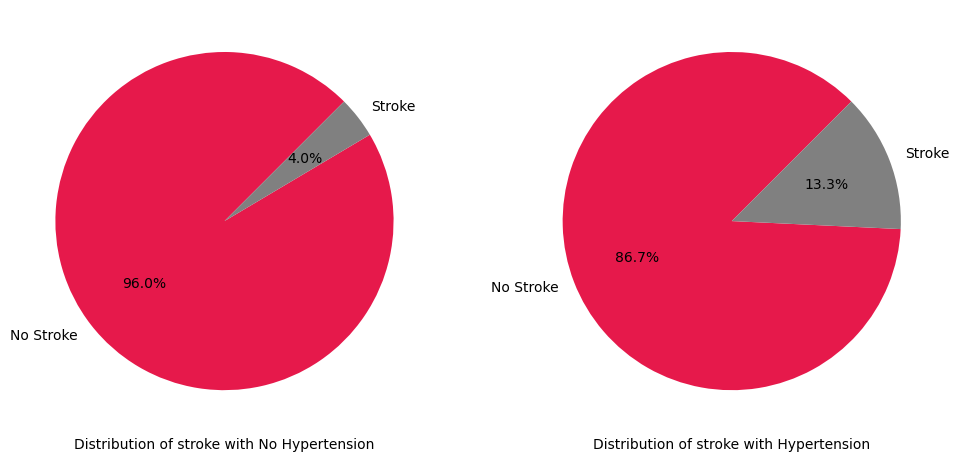

In [28]:
# Check for stroke rate compared to hypertension

fig,ax=plt.subplots(1,2,figsize=(12,8))

color1= ['#e6194b','gray']
ax[0].pie(x=dataset.loc[dataset['hypertension']==0]['stroke'].value_counts(),
        labels=['No Stroke','Stroke'],startangle=45,
        autopct='%1.1f%%',colors=color1)
ax[0].set_xlabel("Distribution of stroke with No Hypertension")

ax[1].pie(x=dataset.loc[dataset['hypertension']==1]['stroke'].value_counts(),
        labels=['No Stroke','Stroke'],startangle=45,
        autopct='%1.1f%%',colors=color1)
ax[1].set_xlabel("Distribution of stroke with Hypertension")

In [29]:
dataset['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

Text(0.5, 0, 'Distribution of stroke with heart_disease')

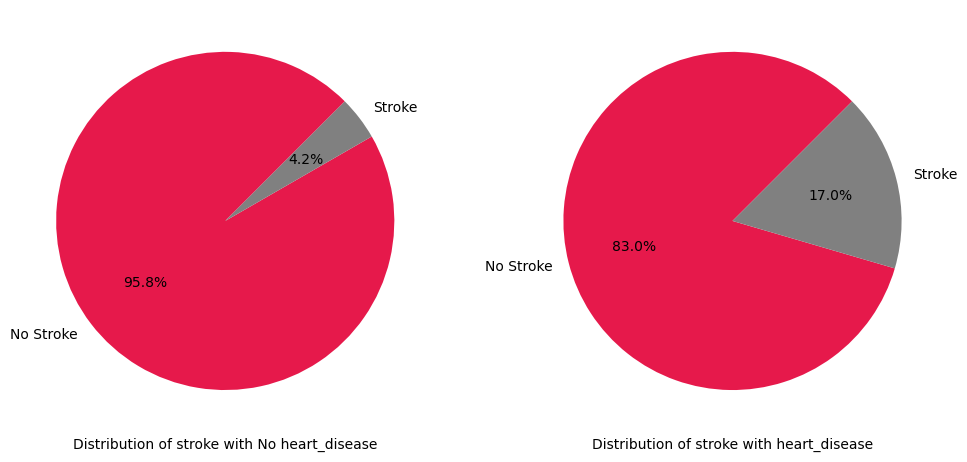

In [30]:
# Check for stroke rate compared to heart disease

fig,ax=plt.subplots(1,2,figsize=(12,8))

color1= ['#e6194b','gray']
ax[0].pie(x=dataset.loc[dataset['heart_disease']==0]['stroke'].value_counts(),
        labels=['No Stroke','Stroke'],startangle=45,
        autopct='%1.1f%%',colors=color1)
ax[0].set_xlabel("Distribution of stroke with No heart_disease")

ax[1].pie(x=dataset.loc[dataset['heart_disease']==1]['stroke'].value_counts(),
        labels=['No Stroke','Stroke'],startangle=45,
        autopct='%1.1f%%',colors=color1)
ax[1].set_xlabel("Distribution of stroke with heart_disease")

After observing above pie charts there no any pattern to detect the directly reason of heart stroke 

## Handling outliers 

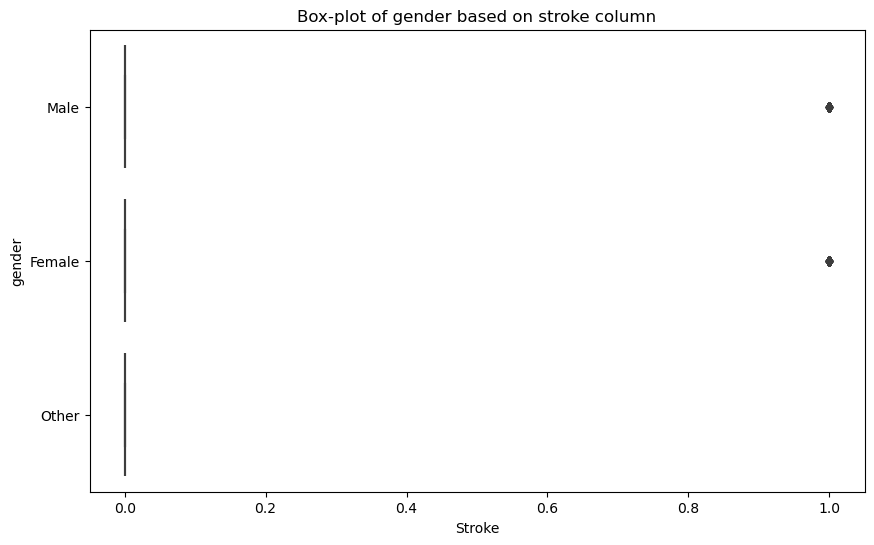

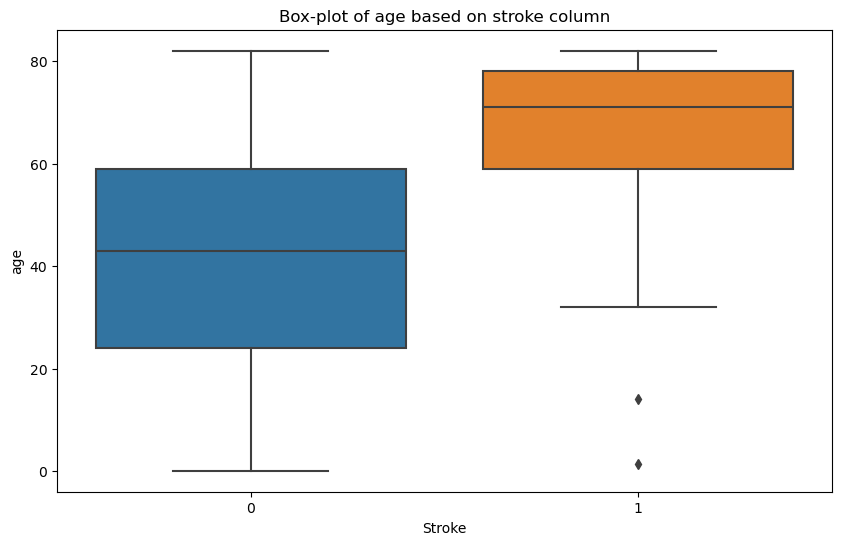

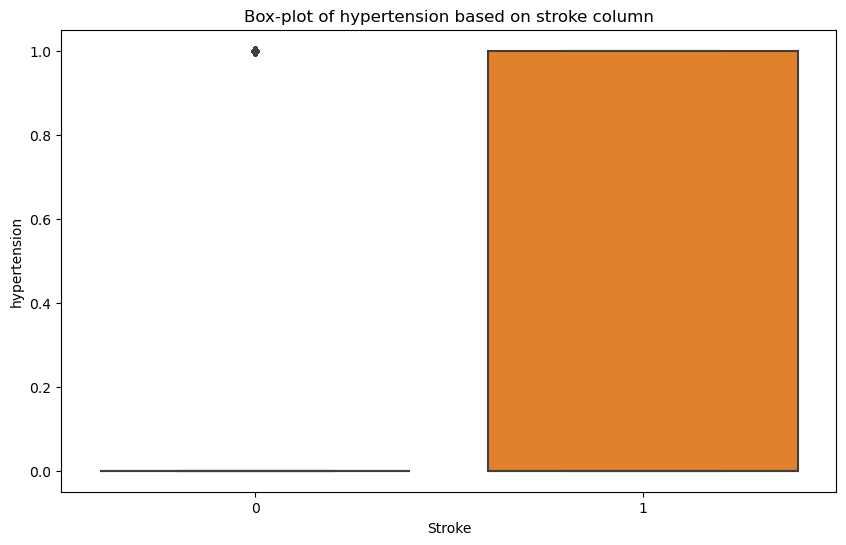

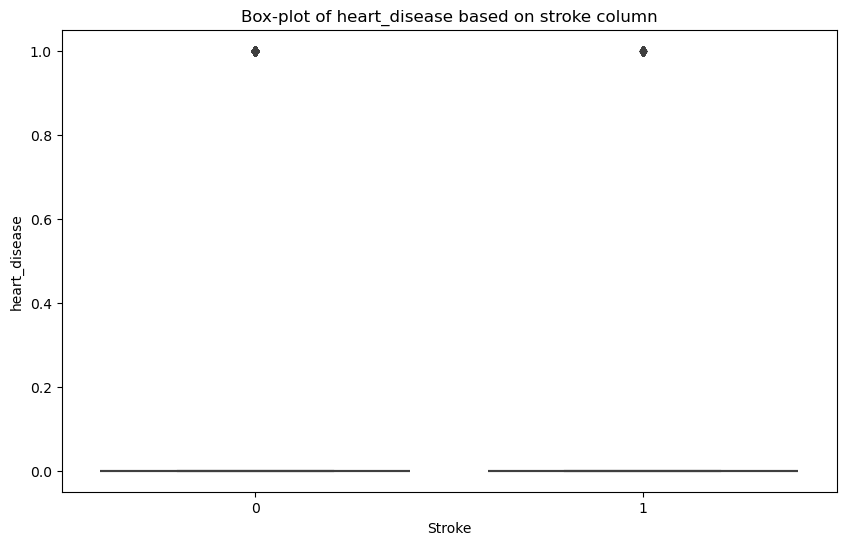

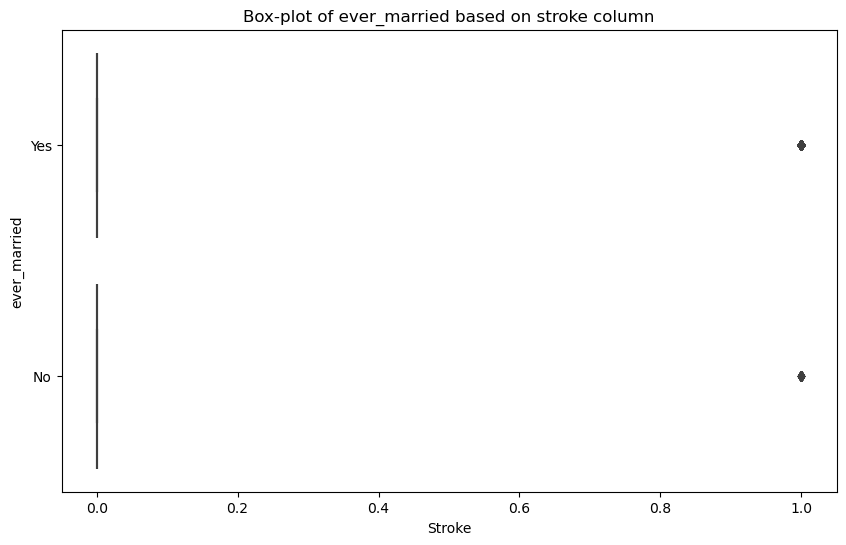

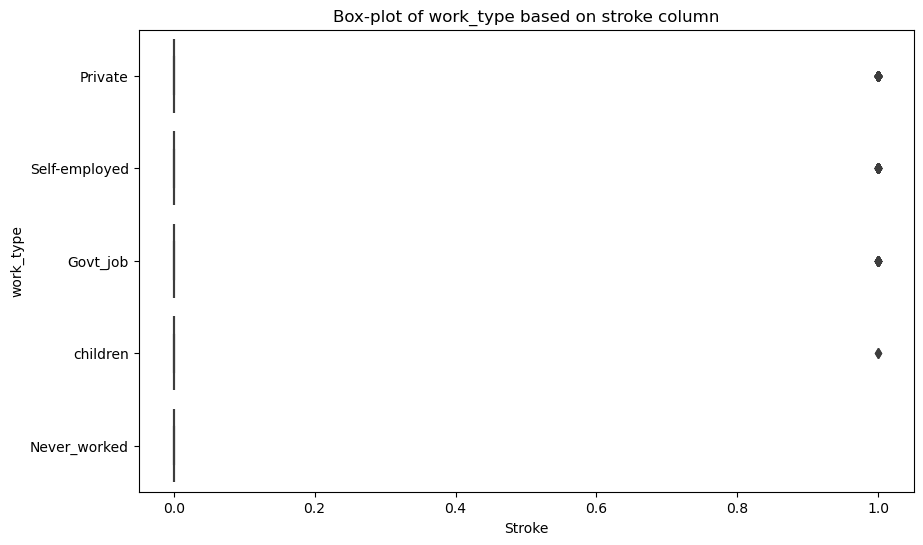

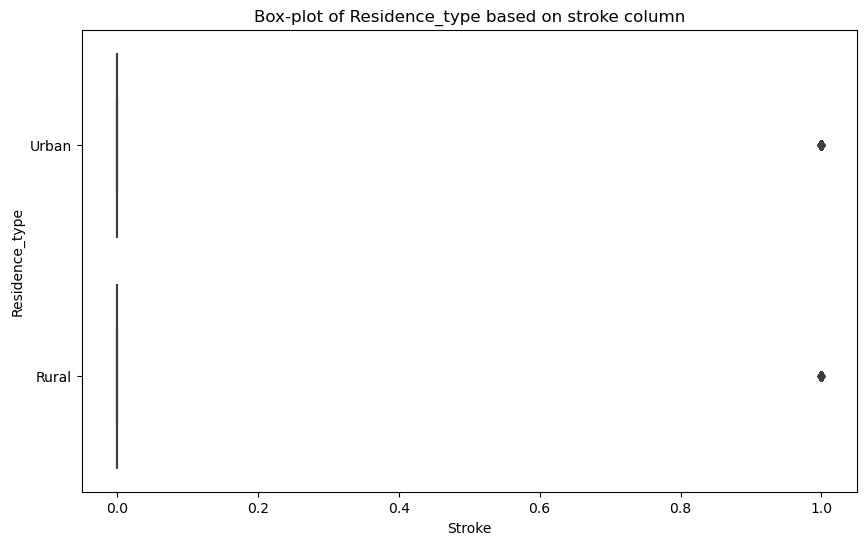

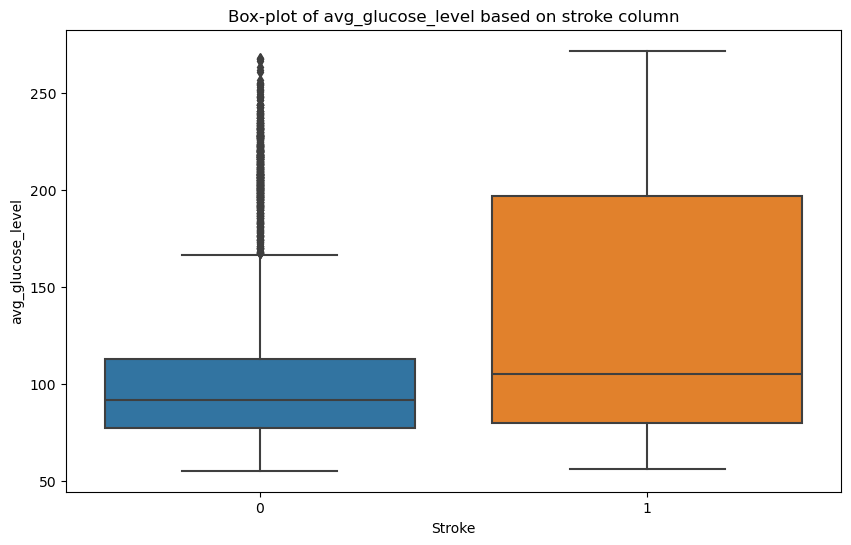

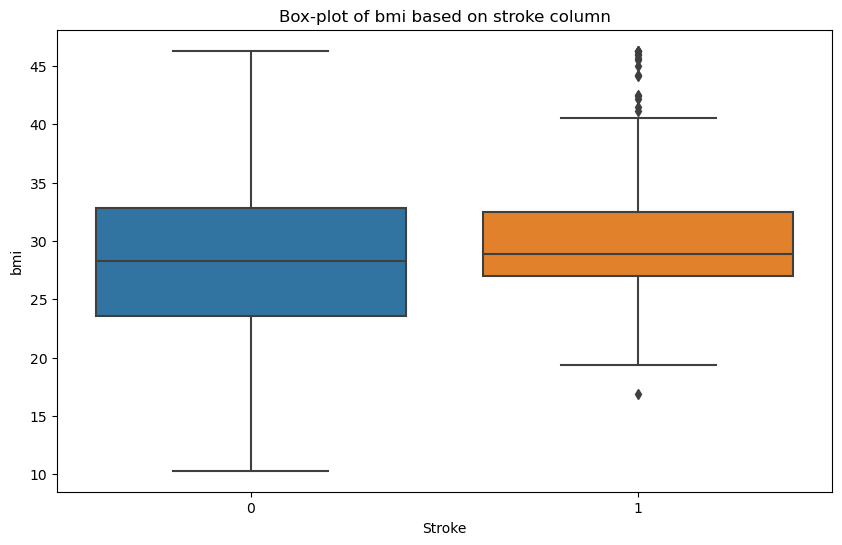

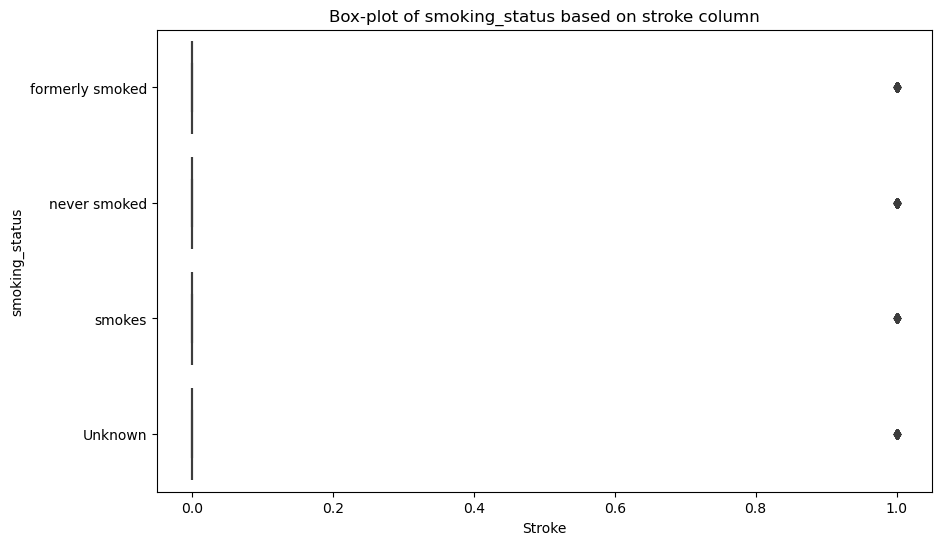

In [42]:
# Function to identify and plot outliers
def outlier_identification(col):
    if col != 'stroke':  # Skipping the 'stroke' column itself
        fig, ax = plt.subplots(1, 1, figsize=(10, 6))
        # Plot a box plot to identify outliers in 'col' based on 'stroke' column
        sns.boxplot(x='stroke', y=col, data=dataset, ax=ax)
        ax.set_title(f'Box-plot of {col} based on stroke column')
        ax.set_xlabel('Stroke')
        ax.set_ylabel(col)
        plt.show()

# Iterate over each column name in the dataset
for col in dataset.columns:
    outlier_identification(col)
    

After observing above plots bmi and avg_glucose have some outliers in the data 

In [43]:
# Outlier handling 

def handling_outlier(col): 
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    dataset[col] = np.where(dataset[col] < lower_bound, lower_bound, dataset[col])
    dataset[col] = np.where(dataset[col] > upper_bound, upper_bound, dataset[col])
    return dataset[col]

In [44]:
handling_outlier('bmi')

0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    28.893237
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64

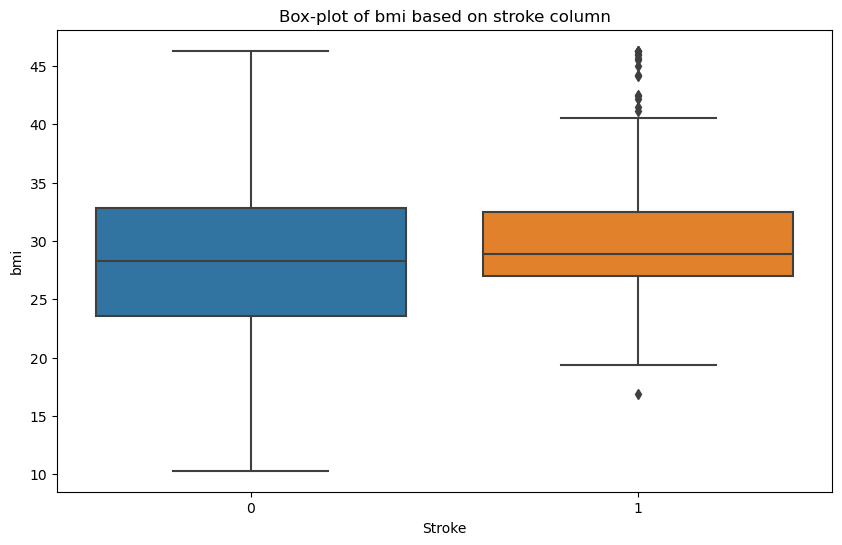

In [45]:
outlier_identification('bmi')

In [46]:
handling_outlier('avg_glucose_level')

0       169.3575
1       169.3575
2       105.9200
3       169.3575
4       169.3575
          ...   
5105     83.7500
5106    125.2000
5107     82.9900
5108    166.2900
5109     85.2800
Name: avg_glucose_level, Length: 5110, dtype: float64

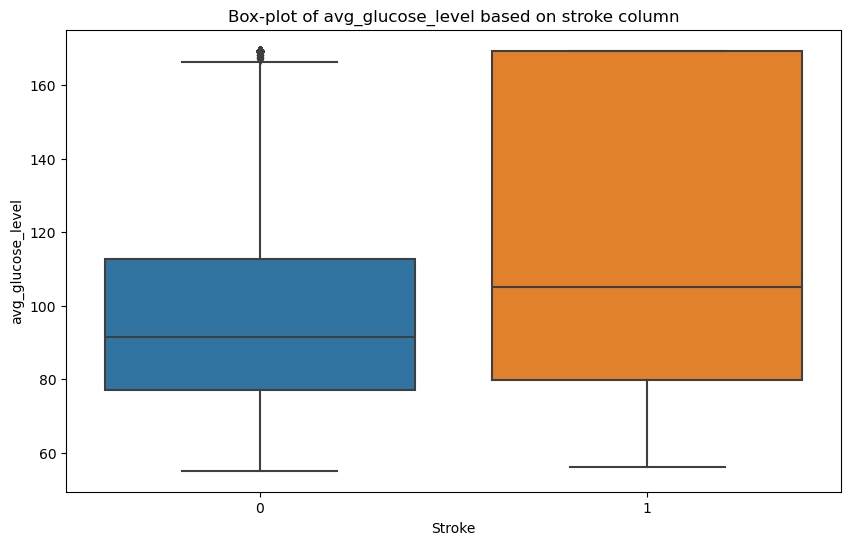

In [47]:
outlier_identification('avg_glucose_level')

In [48]:
# Check the gender tyepes and counts for each

dataset['gender'].value_counts() 

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [51]:
dataset.drop(dataset.loc[dataset['gender']=='Other'].index,inplace=True) # droping 1 row
dataset['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [53]:
dataset.reset_index(drop=True,inplace=True)

In [54]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,169.3575,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,169.3575,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.9200,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,169.3575,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,169.3575,24.000000,never smoked,1


### Encoding for transformation of categorical columns into numerical

In [59]:
dataset_1=pd.get_dummies(dataset,columns=['gender','ever_married','work_type','Residence_type','smoking_status'],
               drop_first=True)

In [60]:
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,169.3575,36.600000,1,1
1,0,61.0,0,0,1,3,0,169.3575,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.9200,32.500000,2,1
3,0,49.0,0,0,1,2,1,169.3575,34.400000,3,1
4,0,79.0,1,0,1,3,0,169.3575,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,80.0,1,0,1,2,1,83.7500,28.893237,2,0
5105,0,81.0,0,0,1,3,1,125.2000,40.000000,2,0
5106,0,35.0,0,0,1,3,0,82.9900,30.600000,2,0
5107,1,51.0,0,0,1,2,0,166.2900,25.600000,1,0


In [64]:
dataset_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5109 non-null   float64
 1   hypertension       5109 non-null   int64  
 2   heart_disease      5109 non-null   int64  
 3   avg_glucose_level  5109 non-null   float64
 4   bmi                5109 non-null   float64
 5   stroke             5109 non-null   int64  
 6   gender_1           5109 non-null   uint8  
 7   ever_married_1     5109 non-null   uint8  
 8   work_type_1        5109 non-null   uint8  
 9   work_type_2        5109 non-null   uint8  
 10  work_type_3        5109 non-null   uint8  
 11  work_type_4        5109 non-null   uint8  
 12  Residence_type_1   5109 non-null   uint8  
 13  smoking_status_1   5109 non-null   uint8  
 14  smoking_status_2   5109 non-null   uint8  
 15  smoking_status_3   5109 non-null   uint8  
dtypes: float64(3), int64(3),

<Axes: >

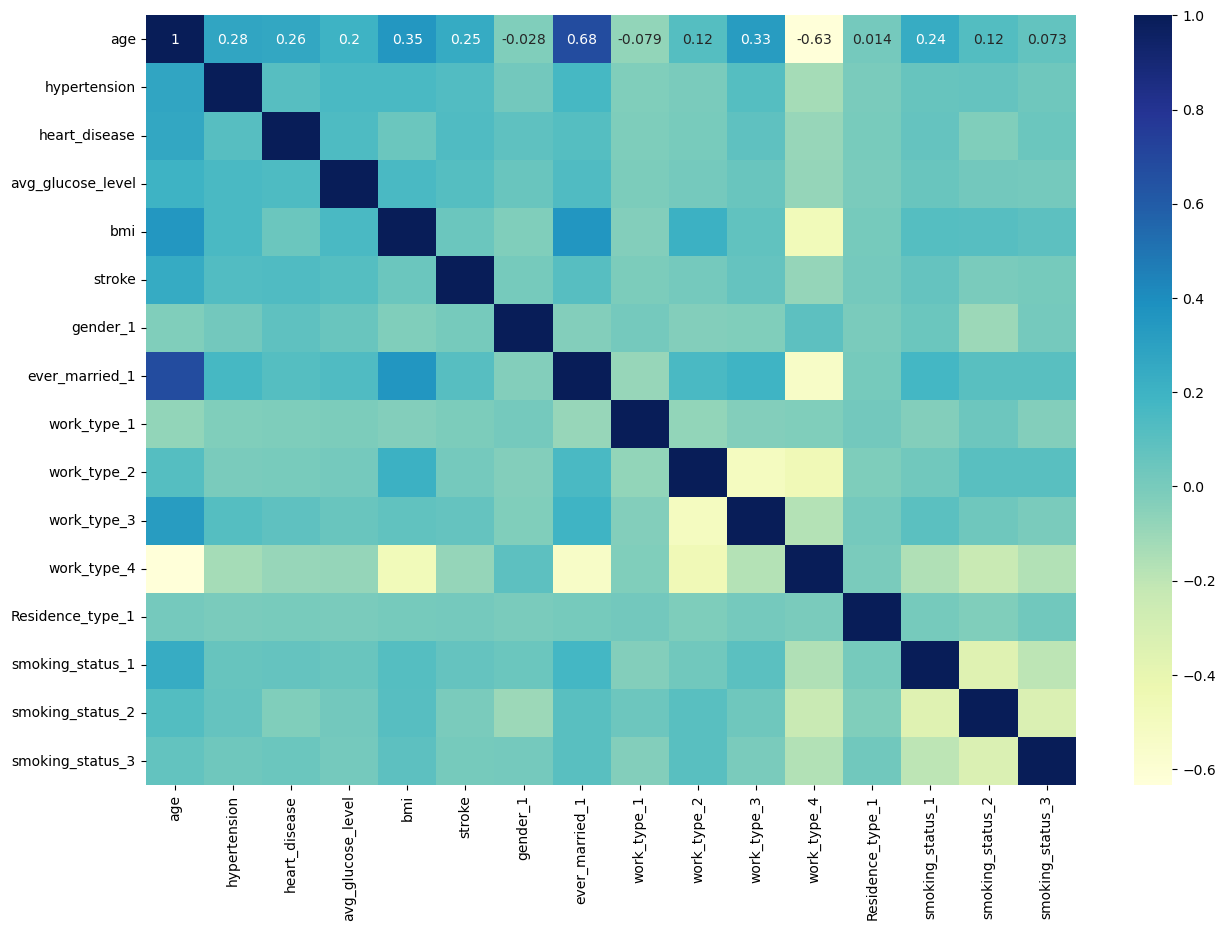

In [67]:
# Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(dataset_1.corr(),annot=True,cmap='YlGnBu')

<Axes: >

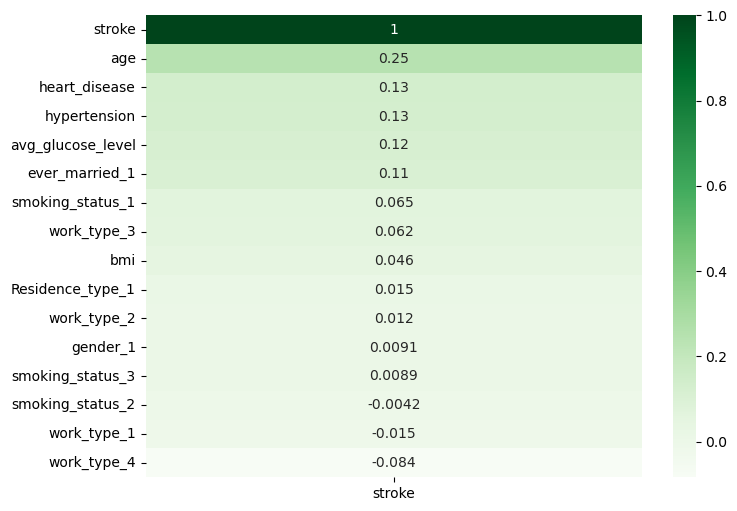

In [65]:
plt.figure(figsize=(8,6))
sns.heatmap(dataset_1.corr()[['stroke']].sort_values(by='stroke',ascending=False),annot=True,cmap='Greens')

In [66]:
dataset_1.corr()[['stroke']]

,stroke
age,0.245239
hypertension,0.127891
heart_disease,0.134905
avg_glucose_level,0.115727
bmi,0.045729
stroke,1.000000
gender_1,0.009081
ever_married_1,0.108299
work_type_1,-0.014885
work_type_2,0.011927


# Handling Imbalance Data 

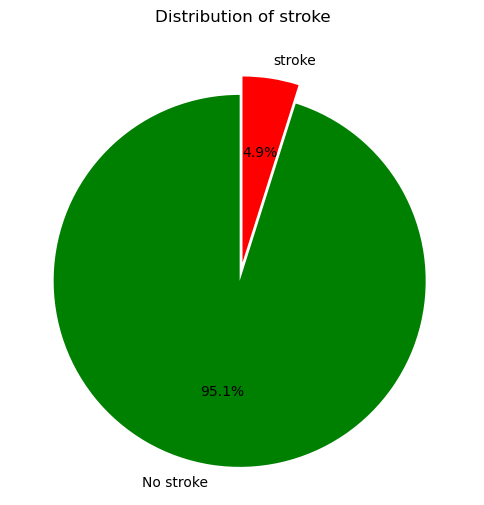

In [69]:
plt.figure(figsize=(6,8))
plt.pie(dataset_1['stroke'].value_counts(),
        labels=['No stroke','stroke'],
        explode=(.1,0),colors=['Green','red'],
        autopct="%1.1f%%",startangle=90)
plt.title('Distribution of stroke')
plt.show()

In [73]:
! pip install collection

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for collection: filename=collection-0.1.6-py3-none-any.whl size=5112 sha256=80a8e7bf3cc02c25c192aa6f57c03ab05f1bf85ed5c9242d0530d3f8ef5e6d73
  Stored in directory: c:\users\salun\appdata\local\pip\cache\wheels\1c\b3\7a\6dd2fd1aa32817819c8c91da9a6b5919148da6eb5855ab0986
Successfully built collection


In [74]:
! pip install imblearn

  Obtaining dependency information for imblearn from https://files.pythonhosted.org/packages/81/a7/4179e6ebfd654bd0eac0b9c06125b8b4c96a9d0a8ff9e9507eb2a26d2d7e/imblearn-0.0-py2.py3-none-any.whl.metadata


In [80]:
# Here the minority class has less count so we are using oversampling 

from collections import Counter
from imblearn.over_sampling import RandomOverSampler 

X = dataset_1.drop(columns=['stroke'])
y = dataset_1['stroke']

ros = RandomOverSampler()

ros_train_x, ros_train_y = ros.fit_resample(X, y)

# After oversampling
print(f'Before resampled dataset shape: {Counter(y)}')
print(f'Resampled dataset shape: {Counter(ros_train_y   )}')

Before resampled dataset shape: Counter({0: 4860, 1: 249})
Resampled dataset shape: Counter({1: 4860, 0: 4860})
